# UBA Girlsday 2023 - Windkraftanlagen KI Workshop

Einleitungs Text

### Importieren von Paketen

Was sind Pakete und warum laden wir beispielhaft diese hier ein?

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 100)
print("scikit-learn version: " + skl.__version__)

scikit-learn version: 1.2.2


### Daten laden

Warum laden wir Daten und was es alles bring sie sich initial erst einmal anzugucken.

In [3]:
MaStRWind = pd.read_parquet("MaStRWind.parquet")
MaStRWind.head()

,EinheitMastrNummer,DatumLetzteAktualisierung,LokationMaStRNummer,NetzbetreiberpruefungStatus,NetzbetreiberpruefungDatum,AnlagenbetreiberMastrNummer,Land,Bundesland,Landkreis,Gemeinde,...,Seelage,ClusterNordsee,Wassertiefe,Kuestenentfernung,Buergerenergie,ClusterOstsee,DatumBeginnVoruebergehendeStilllegung,DatumWiederaufnahmeBetrieb,Kraftwerksnummer,Anlagenzahl
0,SEE909551866762,2022-05-18 10:17:34.028350,None,0,NaT,ABR969791194568,84,1416,None,None,...,639.0,NaN,NaN,NaN,NaN,1541.0,NaT,NaT,None,1
1,SEE987724164556,2023-02-01 12:02:27.548387,None,0,NaT,ABR935455463257,84,Mecklenburg-Vorpommern,Rostock,Rövershagen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,None,1
2,SEE955133850360,2020-12-07 12:38:14.911197,SEL939572930425,1,2020-12-16,ABR972167465865,84,Bayern,Aschaffenburg,Hösbach,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,None,1
3,SEE911843552970,2020-12-15 13:32:22.730926,SEL928266921221,1,2021-06-22,ABR993850992970,84,Niedersachsen,Friesland,Varel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,None,1
4,SEE976450717662,2019-11-12 11:16:00.803698,SEL932355045910,0,2020-11-13,ABR913853173510,84,Schleswig-Holstein,Nordfriesland,Horstedt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,None,1


In [33]:
MaStRWind.describe()

,NetzbetreiberpruefungStatus,Land,Gemeindeschluessel,Postleitzahl,StrasseNichtGefunden,Hausnummer_nv,HausnummerNichtGefunden,Laengengrad,Breitengrad,EinheitSystemstatus,...,AuflagenAbschaltungSonstige,Nachtkennzeichnung,Seelage,ClusterNordsee,Wassertiefe,Kuestenentfernung,Buergerenergie,ClusterOstsee,Anlagenzahl,Spezifischerotorflaeche
count,34142.000000,34142.0,3.246400e+04,32464.000000,33265.000000,33265.000000,33265.000000,33265.000000,33265.000000,34142.0,...,11049.000000,1111.000000,1678.000000,1370.000000,1544.000000,1544.000000,634.000000,308.000000,34142.0,33688.000000
mean,0.878039,84.0,7.792899e+06,35270.581044,0.037457,0.056185,0.054862,9.969614,52.297219,472.0,...,0.147434,0.673267,639.816448,1599.072993,29.735374,38.686683,0.066246,1541.081169,1.0,0.434531
std,0.327246,0.0,4.841446e+06,23287.291062,0.189881,0.230282,0.227715,2.308017,1.542554,0.0,...,0.354554,0.469230,0.387234,259.995891,7.840260,15.544234,0.248908,1.047676,0.0,11.098980
min,0.000000,84.0,1.001000e+06,1067.000000,0.000000,0.000000,0.000000,-3.622044,46.092507,472.0,...,0.000000,0.000000,639.000000,1547.000000,1.320000,6.495000,0.000000,1540.000000,1.0,0.000241
25%,1.000000,84.0,3.451008e+06,18330.500000,0.000000,0.000000,0.000000,8.098458,51.324873,472.0,...,0.000000,0.000000,640.000000,1548.000000,23.790000,29.287500,0.000000,1540.000000,1.0,0.314380
50%,1.000000,84.0,6.633023e+06,27347.500000,0.000000,0.000000,0.000000,9.484986,52.382993,472.0,...,0.000000,1.000000,640.000000,1550.000000,28.200000,33.670000,0.000000,1541.000000,1.0,0.365380
75%,1.000000,84.0,1.207205e+07,48565.000000,0.000000,0.000000,0.000000,11.861002,53.498102,472.0,...,0.000000,1.000000,640.000000,1551.000000,38.700000,55.500000,0.000000,1542.000000,1.0,0.427721
max,1.000000,84.0,1.607705e+07,99996.000000,1.000000,1.000000,1.000000,16.593999,60.003844,472.0,...,1.000000,1.000000,640.000000,2963.000000,60.810000,66.510000,1.000000,1543.000000,1.0,2037.183272


In [21]:
MaStRWind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34142 entries, 0 to 34141
Data columns (total 73 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   EinheitMastrNummer                                  34142 non-null  object        
 1   DatumLetzteAktualisierung                           34142 non-null  datetime64[ns]
 2   LokationMaStRNummer                                 34142 non-null  object        
 3   NetzbetreiberpruefungStatus                         34142 non-null  int64         
 4   NetzbetreiberpruefungDatum                          31852 non-null  datetime64[ns]
 5   AnlagenbetreiberMastrNummer                         34142 non-null  object        
 6   Land                                                34142 non-null  int64         
 7   Bundesland                                          34142 non-null  category      
 8   Landkr

In [57]:
MaStRWind["Lage"].unique()

['Windkraft auf See', 'Windkraft an Land']
Categories (2, object): ['Windkraft an Land', 'Windkraft auf See']

<AxesSubplot: >

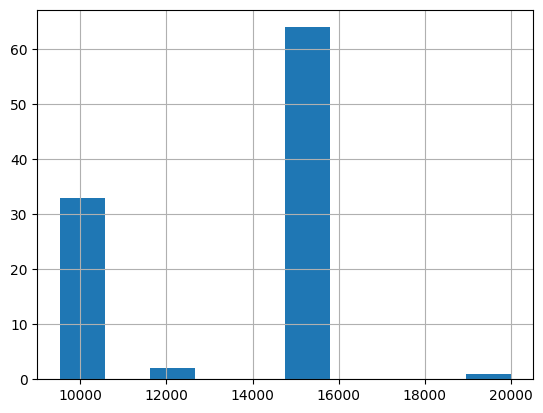

In [63]:
MaStRWind["Nettonennleistung"].nlargest(n=100).hist()

<AxesSubplot: >

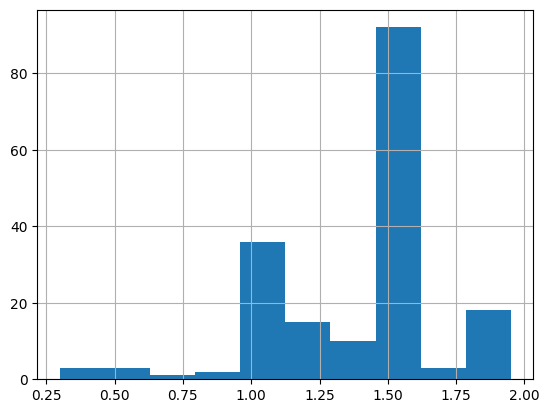

In [54]:
MaStRWind["Nettonennleistung"].loc[MaStRWind["Nettonennleistung"] < 2].hist()

### Analyse Optionen in Bezug auf Stark- und Schwachwindanlagen

Berechnung der spezifischen Nennleistung basierend auf einer Beschreibung/Definition des Frauenhofer IEE [(link)](https://windmonitor.iee.fraunhofer.de/windmonitor_de/3_Onshore/2_technik/5_Stark-_und_Schwachwindanlagen/)

Auch ein für die Analyse vielleicht interessanter Bericht zum rein stöbern [(link)](https://static.agora-energiewende.de/fileadmin/Projekte/2012/Agora_Kurzstudie_Entwicklung_der_Windenergie_in_Deutschland_web.pdf)


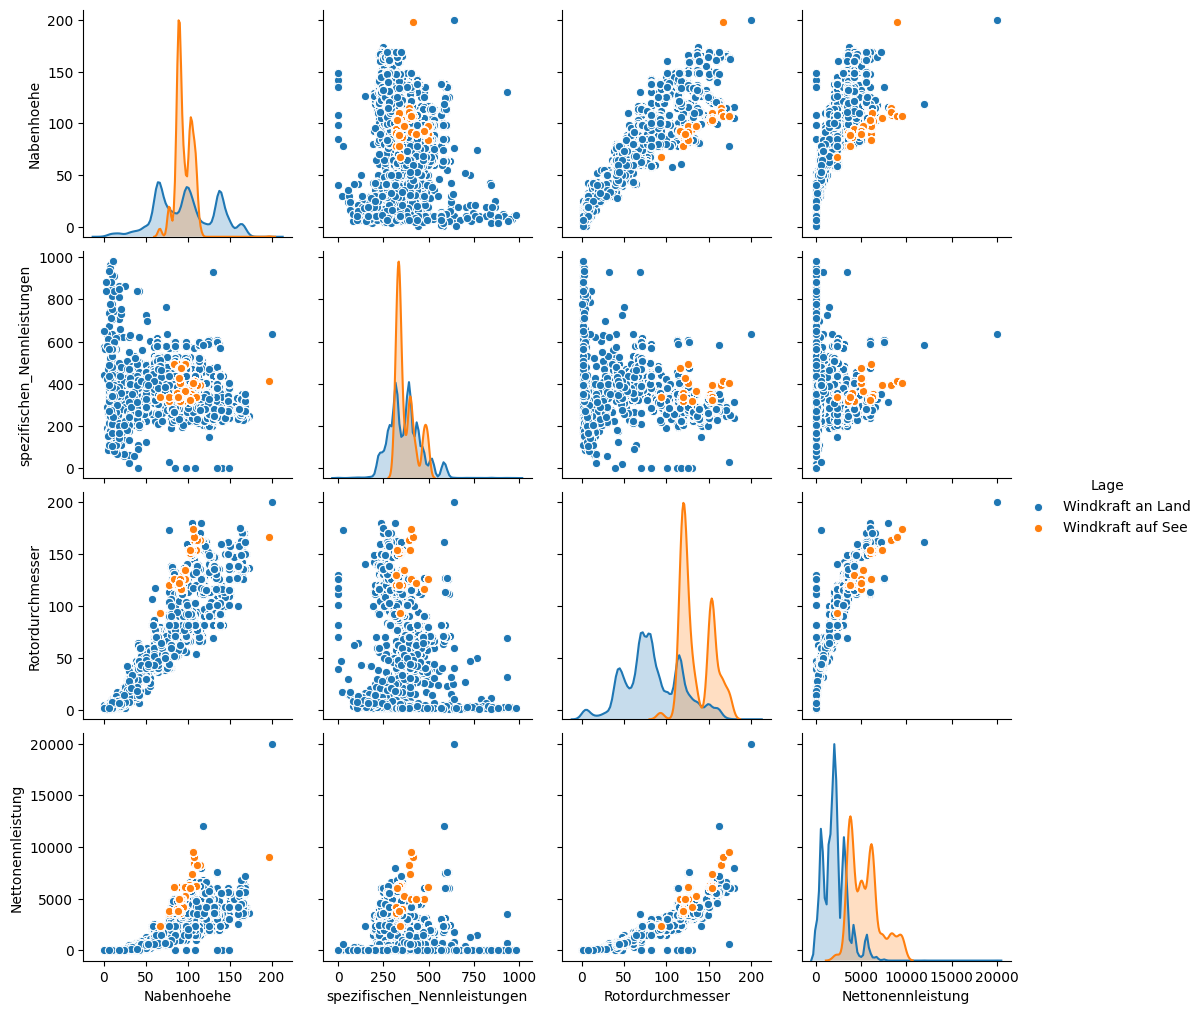

In [70]:
# spezifischen_Nennleistungen: Watt / m²
MaStRWind["spezifischen_Nennleistungen"] = (MaStRWind["Nettonennleistung"] * 1000) / (np.pi * (MaStRWind["Rotordurchmesser"] / 2) ** 2)

# schneller Filter für Ausreißer
MaStRWind_filtered = MaStRWind.loc[MaStRWind["spezifischen_Nennleistungen"] < 1000]

# Plot
sns.pairplot(MaStRWind_filtered[["Nabenhoehe","spezifischen_Nennleistungen","Rotordurchmesser","Nettonennleistung","Lage"]], hue="Lage")

<AxesSubplot: >

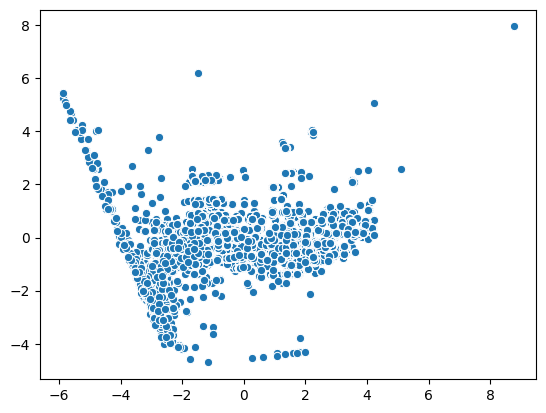

In [84]:
from sklearn import preprocessing, decomposition

wind = MaStRWind_filtered[["Nabenhoehe","spezifischen_Nennleistungen","Rotordurchmesser","Nettonennleistung"]].dropna()

# Daten Standardisieren
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(wind)
wind_scaled = std_scaler.transform(wind)

# Dimensionalität reduzieren für mögliches Clustering
pca = decomposition.PCA(n_components=2, random_state= 42)
pca.fit(wind_scaled)
wind_pca = pca.transform(wind_scaled)

sns.scatterplot(x=wind_pca[:,0], y=wind_pca[:,1])